# Initial EDA

## Importing files

In [1]:
# import libraries

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # numerical computation
from matplotlib import pyplot as plt # for plotting
import seaborn as sns # for plotting
from scipy.fft import fft # fourier transform
from pandas.plotting import autocorrelation_plot # for autocorrelation plot

### Import First Condition csv

In [2]:
# import data from csv files version 1

def import_csv(file_path, condition):
    """
    Import single csv file into a Pandas DataFrame.
    
    Args:
        file_path: Path to CSV file
        condition: 0 if control, 1 if condition
        
    Returns:
        df: Pandas DataFrame
    """
    
    df = pd.read_csv(file_path, index_col='timestamp')
    
    # add "condition" column
    df['condition'] = condition
    
    return df


In [10]:
# importing condition data first file
condition_filepath = '../data/depresjon/condition/condition_1.csv'


condition_1 = import_csv(condition_filepath, 1)
print(condition_1.head())


                           date  activity  condition
timestamp                                           
2003-05-07 12:00:00  2003-05-07         0          1
2003-05-07 12:01:00  2003-05-07       143          1
2003-05-07 12:02:00  2003-05-07         0          1
2003-05-07 12:03:00  2003-05-07        20          1
2003-05-07 12:04:00  2003-05-07       166          1


### Quick EDA

#### Summary statistics

In [14]:
# summary statistics
print(condition_1.describe())

# check for missing values
print("\nMissing values: \n", condition_1.isna().sum())

           activity  condition
count  23244.000000    23244.0
mean     146.948030        1.0
std      294.592424        0.0
min        0.000000        1.0
25%        0.000000        1.0
50%        9.000000        1.0
75%      172.000000        1.0
max     3526.000000        1.0

Missing values: 
 date         0
activity     0
condition    0
dtype: int64


#### Autocorrelation

* Plotting correlation of timeseries with a lagged version of itself
  * How well does it correlate with past values over different time lags.
* Detect *periodicity* or *cyclic* patterns
  * High autocorrelation at a certain lag suggests repeating pattern at that cycle
* Are there any periodic peaks?  (Daily cycles peak at lag of 1440 minutes (24 hours))
* Be aware: 
  * Slow decay suggests high correlation between distant points
  * Fast decay means short-term correlations
* High correlation could mean overfitting

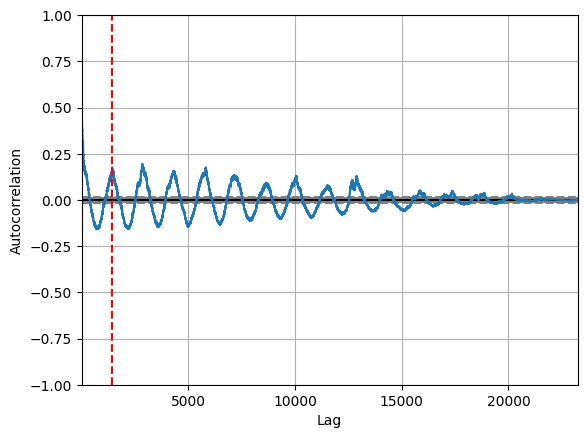

In [36]:
# check for autocorrelation
autocorrelation_plot(condition_1["activity"])
# add 24 hour line
plt.axvline(x=1440, color='red', linestyle='--')

plt.show()

**Interpetation**

* There is a clear 24 hour periodic pattern, to be expected - circadian rhythms, similar days, etc.
  * Person's activities broadly follow daily pattern but this correlation decays over longer periods (not perfectly correlated over weeks)
* autocorrelation value represents correlation coefficient between time-series and lagged version
* value of 0.2 is moderate ?? daily correlation

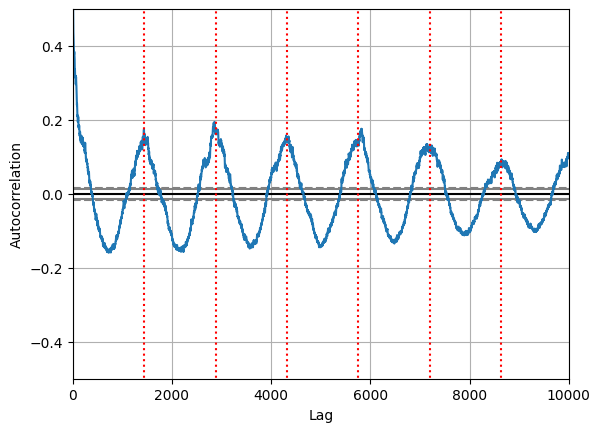

In [34]:
# zoom in on axes
autocorrelation_plot(condition_1["activity"])
plt.ylim(-0.5, 0.5)
plt.xlim(0, 10000)

# add daily lines (24 hours = 1440 minutes)
lags = np.arange(len(condition_1))
plt.vlines(lags[1440::1440], ymin=-1, ymax=1, colors='red', linestyles='dotted')
plt.show()


Above plot zooms in on the first 10,000 minutes with red lines for each 24 hours...

#### Fourier transformation

* decomposes a time series into constituent sinusoids of different frequencies
* helps understand dominant periodic signals
* peaks indicate presence of that frequency - higher peak = more contribution

TODO read up on Fourier transformation

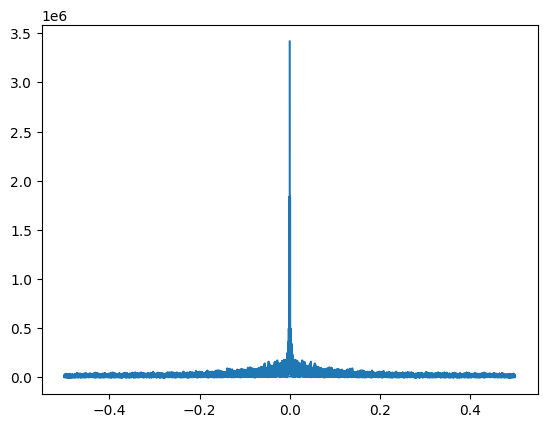

In [58]:
# fourier transform
fft_result = (fft(condition_1["activity"]))

# plot fourier transform
amps = np.abs(fft(condition_1['activity'])) # get amplitudes
freqs = np.fft.fftfreq(len(condition_1['activity'])) # get frequencies

plt.plot(freqs, amps)
plt.show()

**Interpretation**

* spike at 0 is expected - strong baseline signal around 0
  * 'DC (Direct Current) component' - mean value of signal over time
* oscillating patterns around mean are smaller in magnitude
* frequencies are "cycles per unit of time" - low frequencies are slow oscillations, high freqs are rapid changes



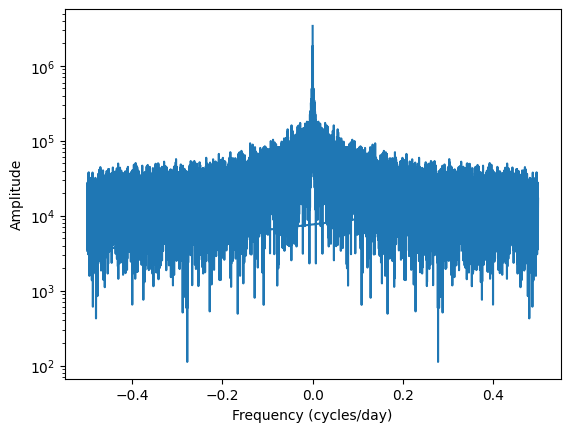

In [64]:

# plot fourier transform with log scale
freqs = np.fft.fftfreq(len(fft_result))
fft_amp = np.abs(fft_result) # Take magnitude 

#plt.plot(freqs[freqs>-0.4], fft_amp[freqs>-0.4])
plt.plot(freqs, fft_amp)
plt.yscale('log')


plt.xlabel('Frequency (cycles/day)')
plt.ylabel('Amplitude')
plt.show()

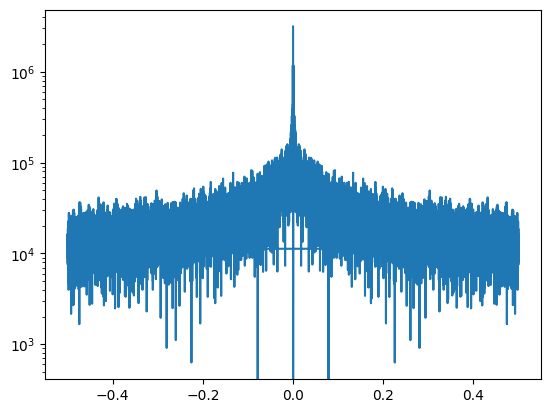

In [70]:
# smoothing fourier transform - amplitudes

from scipy.signal import savgol_filter
fft_amp_smoothed = savgol_filter(fft_amp, window_length=5, polyorder=2)
plt.plot(freqs, fft_amp_smoothed)
plt.yscale('log')
plt.show()  

**Comments**

TODO

No idea what to do with this!

## Validate data - single file

TODO

1. Double check function works on single file
2. work out reasonable outlier value - not 200!
3. what other validation?? 

## Import all files

## Basic visualisation

## Preprocessing, Features

* Aggregate to something - 5 min, 15 min, hourly, daily?
  * Consider daily average and full series
  * Resample to even intervals?
  * Imputation required?
* Aggregation options:
  * `mean`, `std dev`, `min`, `max`
  * % time inactive per day
  * Interdaily stability: correlation of each day's activity to mean
  * Intradaily variability: hour-to-hour transitions/fragmentation
  * Relative amplitude: ratio max 10hrs to min 5hrs
  * Entropy: predictability of activity patterns
  * Activity levels for different periods (e.g. morning, afternoon, night)
  * Measures of circadian rhythmicity (cosinor analysis)
  * Activity counts in different frequency bands (FFT)
  * Lagged autocorrelation features
  * Rolling averages to assess local variability